In [39]:
# This is a list of sources for specific hard coded satellites
# - https://en.wikipedia.org/wiki/List_of_GPS_satellites
# - https://en.wikipedia.org/wiki/List_of_Galileo_satellites
# - https://en.wikipedia.org/wiki/List_of_GLONASS_satellites
# - https://en.wikipedia.org/wiki/List_of_BeiDou_satellites

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#CONSTELLATIONS=[    "starlink",
#                    "oneweb",
#                    "planet",
#                    "iridium",
#                    "gps",
#                    "glonass",
#                    "meteosat",
#                    "intelsat",
#                    "ses",
#                    "telesat",
#                    "orbcomm"]

CONSTELLATIONS=[    "starlink",
                    "oneweb",
                    "iridium",
                    "telesat",
                    "orbcomm"]

FILTER=[
            "starlink",
            "iridium",
            "telesat",
            "orbcomm",
            "swarm"
]

path = "constellations/{}.csv"

custom_df = pd.read_csv("satcat_custom.csv")
df_dict = {}

def classify_orbit(altitude_km):
    """Classifies orbit based on altitude.
    """
    if(altitude_km < 2000):
        return "LEO" # Low Earth Orbit
    elif(altitude_km < 35786):
        return "MEO" # Medium Earth Orbit
    else:
        return "GSO" # Geosynchronous Orbit

for c in CONSTELLATIONS:
    temp_df = pd.read_csv(path.format(c))
    temp_df = temp_df.join(custom_df.set_index("OBJECT_ID"), on="OBJECT_ID", rsuffix="_CUSTOM")
    temp_df["LAUNCH_YEAR"] = temp_df.apply(lambda row: int(row["OBJECT_ID"].split("-")[0]), axis=1)
    df_dict[c] = temp_df

# manual
swarm_df = pd.read_csv(path.format("swarm_manual"))
#swarm_df.set_index("OBJECT_ID", inplace=True)
df_dict["swarm"] = swarm_df
df_dict["swarm"] = df_dict["swarm"][df_dict["swarm"]["LAUNCH_YEAR"] >= 2020]

In [43]:
# Filtering out specific satellites

df_dict["orbcomm"] = df_dict["orbcomm"][df_dict["orbcomm"]["OBJECT_NAME"] != "VESSELSAT 1"]

In [61]:
for c in FILTER:
#for c in ["swarm"]:
    print(c)
    print("#Satellites: ", len(df_dict[c]))
    print("First Launch Year", df_dict[c]["LAUNCH_YEAR"].sort_values().iloc[0])   
    print("Last Launch Year", df_dict[c]["LAUNCH_YEAR"].sort_values().iloc[-1])
    print("Amount of decayed satellites", len(df_dict[c]["DECAY_DATE"].dropna()))
    print(df_dict[c]["DECAY_DATE"].dropna())

In [64]:
df_dict["swarm"][df_dict["swarm"]["LAUNCH_YEAR"] >= 2020]

,Unnamed: 0,OBJECT_NAME,OBJECT_ID,NORAD_CAT_ID,OBJECT_TYPE,OPS_STATUS_CODE,OWNER,LAUNCH_DATE,LAUNCH_SITE,DECAY_DATE,...,INCLINATION,APOGEE,PERIGEE,RCS,DATA_STATUS_CODE,ORBIT_CENTER,ORBIT_TYPE,LAUNCH_YEAR,ORBIT_CLASS,OBJECT_CLASS
9,46299,SPACEBEE-21,2020-061AE,46300,PAY,+,US,2020-09-03,FRGUI,NaN,...,97.44,496.0,493.0,NaN,NaN,EA,ORB,2020,LEO,SPACEBEE
10,46300,SPACEBEE-20,2020-061AF,46301,PAY,+,US,2020-09-03,FRGUI,NaN,...,97.44,496.0,494.0,NaN,NaN,EA,ORB,2020,LEO,SPACEBEE
11,46301,SPACEBEE-15,2020-061AG,46302,PAY,+,US,2020-09-03,FRGUI,NaN,...,97.44,491.0,489.0,NaN,NaN,EA,ORB,2020,LEO,SPACEBEE
12,46302,SPACEBEE-19,2020-061AH,46303,PAY,+,US,2020-09-03,FRGUI,NaN,...,97.44,494.0,492.0,NaN,NaN,EA,ORB,2020,LEO,SPACEBEE
13,46303,SPACEBEE-18,2020-061AJ,46304,PAY,+,US,2020-09-03,FRGUI,NaN,...,97.44,494.0,492.0,NaN,NaN,EA,ORB,2020,LEO,SPACEBEE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,52371,SPACEBEE-151,2022-047V,52413,PAY,+,US,2022-05-02,RLLB,NaN,...,97.44,527.0,513.0,NaN,NaN,EA,ORB,2022,LEO,SPACEBEE
151,52372,SPACEBEE-152,2022-047W,52414,PAY,+,US,2022-05-02,RLLB,NaN,...,97.44,527.0,513.0,NaN,NaN,EA,ORB,2022,LEO,SPACEBEE
152,52373,SPACEBEE-147,2022-047X,52415,PAY,+,US,2022-05-02,RLLB,NaN,...,97.44,527.0,513.0,NaN,NaN,EA,ORB,2022,LEO,SPACEBEE
153,52374,SPACEBEE-155,2022-047Y,52416,PAY,+,US,2022-05-02,RLLB,NaN,...,97.44,529.0,514.0,NaN,NaN,EA,ORB,2022,LEO,SPACEBEE


## Apogee / Altitude - Orbital Shells

starlink
Apogee that are NaN 109 from total of 3248
(s: 1, m: 158.115) (s: 3, m: 166.575) (s: 1, m: 170.805) (s: 1, m: 179.265) (s: 1, m: 301.93500000000006) (s: 1, m: 327.31500000000005) (s: 2, m: 331.545) (s: 3, m: 335.775) (s: 4, m: 340.005) (s: 2, m: 344.235) (s: 82, m: 348.46500000000003) (s: 167, m: 352.69500000000005) (s: 4, m: 356.92500000000007) (s: 3, m: 361.155) (s: 1, m: 369.615) (s: 4, m: 373.845) (s: 1, m: 382.30500000000006) (s: 1, m: 390.765) (s: 7, m: 403.45500000000004) (s: 12, m: 407.68500000000006) (s: 15, m: 416.14500000000004) (s: 8, m: 420.375) (s: 1, m: 433.06500000000005) (s: 3, m: 441.52500000000003) (s: 5, m: 445.755) (s: 1, m: 462.67500000000007) (s: 5, m: 466.90500000000003) (s: 10, m: 471.13500000000005) (s: 10, m: 475.365) (s: 7, m: 479.595) (s: 1, m: 483.82500000000005) (s: 1, m: 488.05500000000006) (s: 6, m: 492.285) (s: 9, m: 496.51500000000004) (s: 8, m: 500.745) (s: 8, m: 504.975) (s: 2, m: 509.20500000000004) (s: 5, m: 513.435) (s: 2, m: 517.665) (s

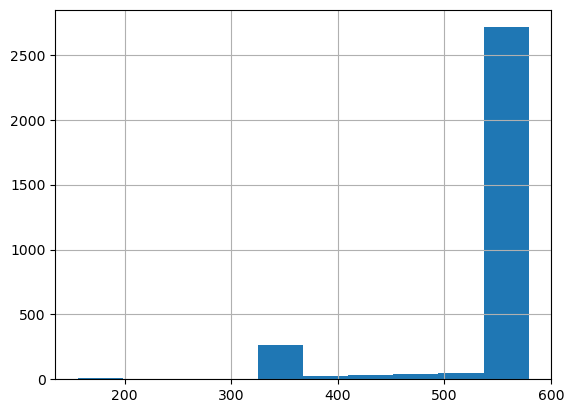

oneweb
Apogee that are NaN 36 from total of 460
(s: 27, m: 592.19) (s: 8, m: 598.5699999999999) (s: 1, m: 681.51) (s: 1, m: 726.1700000000001) (s: 4, m: 789.97) (s: 3, m: 796.3499999999999) (s: 4, m: 802.73) (s: 2, m: 809.1099999999999) (s: 26, m: 1185.5300000000002) (s: 35, m: 1191.9099999999999) (s: 42, m: 1198.29) (s: 80, m: 1204.67) (s: 50, m: 1211.0500000000002) (s: 91, m: 1217.4299999999998) (s: 50, m: 1223.81) 


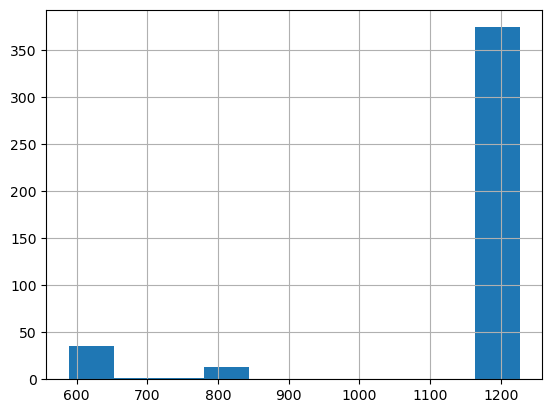

iridium
Apogee that are NaN 0 from total of 75
(s: 3, m: 656.615) (s: 3, m: 748.865) (s: 1, m: 750.095) (s: 1, m: 768.545) (s: 67, m: 778.385) 


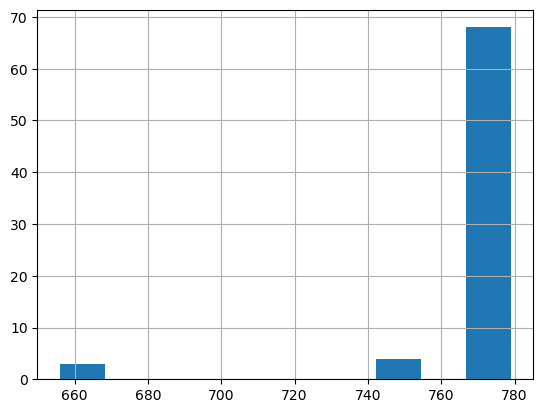

telesat
Apogee that are NaN 20 from total of 21
(s: 1, m: 995.005) 


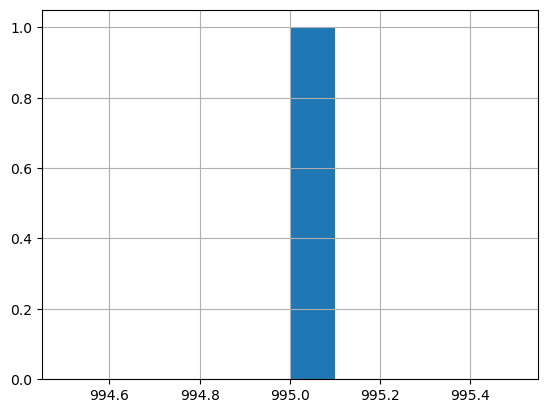

orbcomm
Apogee that are NaN 0 from total of 17
(s: 1, m: 691.875) (s: 1, m: 697.125) (s: 11, m: 709.375) (s: 1, m: 711.125) (s: 1, m: 725.125) (s: 1, m: 747.875) (s: 1, m: 865.125) 


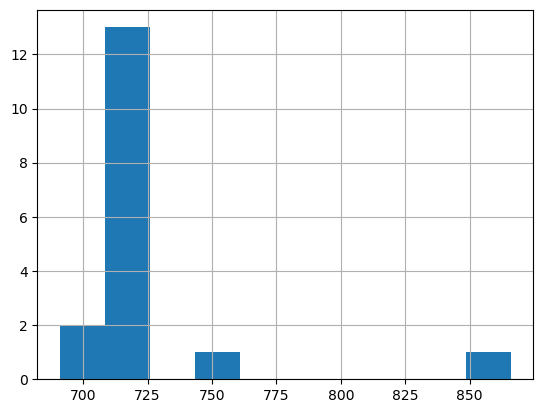

swarm
Apogee that are NaN 0 from total of 146
(s: 1, m: 294.185) (s: 1, m: 296.555) (s: 1, m: 301.295) (s: 1, m: 324.995) (s: 1, m: 332.105) (s: 1, m: 346.325) (s: 1, m: 353.435) (s: 1, m: 370.02500000000003) (s: 1, m: 374.765) (s: 2, m: 377.135) (s: 1, m: 381.875) (s: 1, m: 386.615) (s: 2, m: 388.985) (s: 2, m: 391.355) (s: 1, m: 396.095) (s: 2, m: 400.835) (s: 1, m: 403.205) (s: 2, m: 405.575) (s: 1, m: 407.945) (s: 1, m: 410.315) (s: 1, m: 415.055) (s: 1, m: 417.425) (s: 2, m: 419.795) (s: 1, m: 424.535) (s: 2, m: 469.565) (s: 4, m: 471.935) (s: 2, m: 476.675) (s: 3, m: 479.045) (s: 3, m: 481.415) (s: 6, m: 483.785) (s: 12, m: 486.15500000000003) (s: 4, m: 488.52500000000003) (s: 12, m: 490.89500000000004) (s: 11, m: 493.26500000000004) (s: 6, m: 495.63500000000005) (s: 3, m: 498.005) (s: 2, m: 514.595) (s: 12, m: 516.9649999999999) (s: 2, m: 519.335) (s: 2, m: 524.075) (s: 14, m: 526.4449999999999) (s: 16, m: 528.815) 


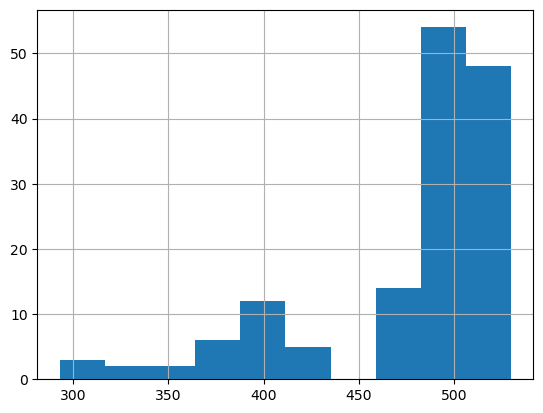

In [67]:
#for c in df_dict:
for c in df_dict:
    print(c)
    nas = df_dict[c].dropna(subset=["APOGEE"]).index
    print("Apogee that are NaN", len(df_dict[c]) - len(nas), "from total of", len(df_dict[c]))
    hist, edges = np.histogram(df_dict[c].dropna(subset=["APOGEE"])["APOGEE"], bins=100)
    size_mean = []
    for i in range(len(hist)):
        if(hist[i] > 0):
            #print("Bin of size", hist[i], "From {} to {}".format(edges[i], edges[i+1]))
            size_mean.append((hist[i], (edges[i] + edges[i+1]) / 2))
    for s, m in size_mean:
        print("(s: {}, m: {}) ".format(s, m), end="")
    print("")
    #print("histlen", len(hist), "edgelen", len(edges))
    df_dict[c].dropna(subset=["APOGEE"])["APOGEE"].hist(bins=10)
    plt.show()

## RAAN Histogram

starlink
(s: 39, m: 2.415866) (s: 20, m: 5.995998) (s: 40, m: 9.57613) (s: 19, m: 13.156262) (s: 20, m: 16.736394) (s: 21, m: 20.316526000000003) (s: 20, m: 23.896658000000002) (s: 40, m: 27.47679) (s: 65, m: 31.056922) (s: 55, m: 34.63705399999999) (s: 20, m: 38.217186) (s: 44, m: 41.797318) (s: 25, m: 45.377449999999996) (s: 26, m: 48.957582) (s: 51, m: 52.537713999999994) (s: 21, m: 56.117846) (s: 40, m: 59.69797799999999) (s: 21, m: 63.27811) (s: 41, m: 66.85824199999999) (s: 23, m: 70.438374) (s: 39, m: 74.018506) (s: 42, m: 77.598638) (s: 21, m: 81.17876999999999) (s: 45, m: 84.758902) (s: 20, m: 88.339034) (s: 88, m: 91.91916599999999) (s: 22, m: 95.499298) (s: 38, m: 99.07943) (s: 26, m: 102.659562) (s: 22, m: 106.23969399999999) (s: 41, m: 109.81982599999999) (s: 23, m: 113.399958) (s: 40, m: 116.98008999999999) (s: 21, m: 120.560222) (s: 45, m: 124.140354) (s: 26, m: 127.720486) (s: 21, m: 131.300618) (s: 44, m: 134.88074999999998) (s: 20, m: 138.460882) (s: 45, m: 142.041014

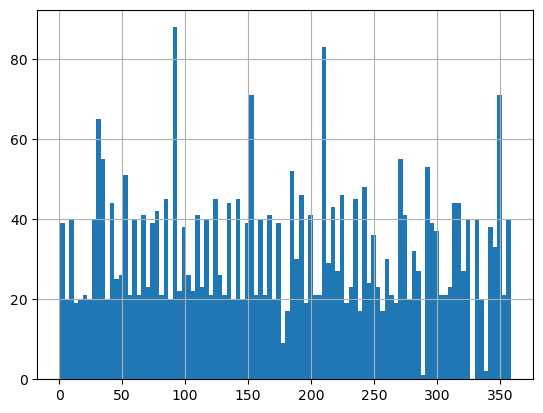

oneweb
(s: 37, m: 127.8242095) (s: 39, m: 157.3765135) (s: 20, m: 172.1526655) (s: 11, m: 173.9996845) (s: 42, m: 186.9288175) (s: 1, m: 188.7758365) (s: 13, m: 203.5519885) (s: 30, m: 205.3990075) (s: 50, m: 218.3281405) (s: 14, m: 233.1042925) (s: 25, m: 236.7983305) (s: 1, m: 240.4923685) (s: 50, m: 247.8804445) (s: 36, m: 262.6565965) (s: 41, m: 279.2797675) (s: 49, m: 294.05591949999996) (s: 1, m: 310.67909050000003) 


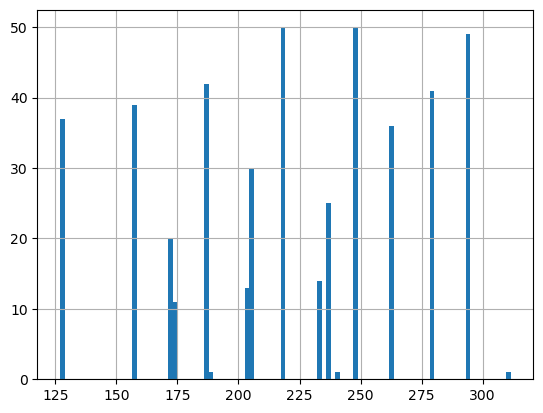

iridium
(s: 12, m: 112.96818400000001) (s: 1, m: 142.987576) (s: 11, m: 144.567544) (s: 3, m: 174.586936) (s: 11, m: 176.166904) (s: 11, m: 206.18629600000003) (s: 1, m: 207.766264) (s: 12, m: 237.78565600000002) (s: 13, m: 269.385016) 


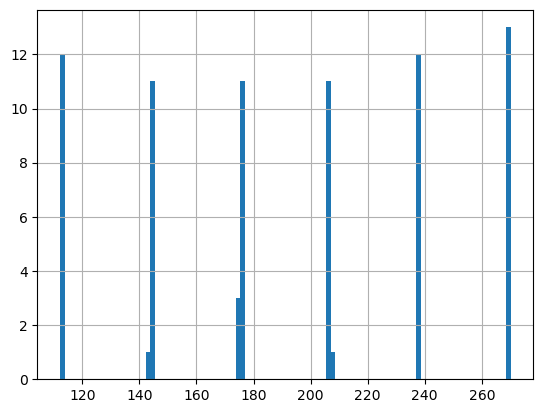

telesat
(s: 1, m: 26.7078865) (s: 1, m: 36.1482055) (s: 1, m: 42.441751499999995) (s: 1, m: 45.588524500000005) (s: 1, m: 48.7352975) (s: 1, m: 64.4691625) (s: 2, m: 67.6159355) (s: 2, m: 70.7627085) (s: 1, m: 89.6433465) (s: 4, m: 92.7901195) (s: 1, m: 180.8997635) (s: 1, m: 287.89004550000004) (s: 1, m: 325.6513215) (s: 2, m: 331.9448675) (s: 1, m: 338.2384135) 


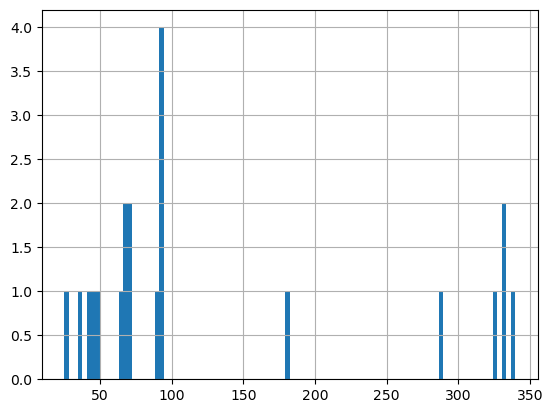

orbcomm
(s: 3, m: 4.233356) (s: 3, m: 93.34866799999999) (s: 1, m: 117.34125199999998) (s: 1, m: 144.761348) (s: 2, m: 182.46398) (s: 1, m: 192.74651599999999) (s: 4, m: 271.579292) (s: 1, m: 340.129532) (s: 1, m: 343.557044) 


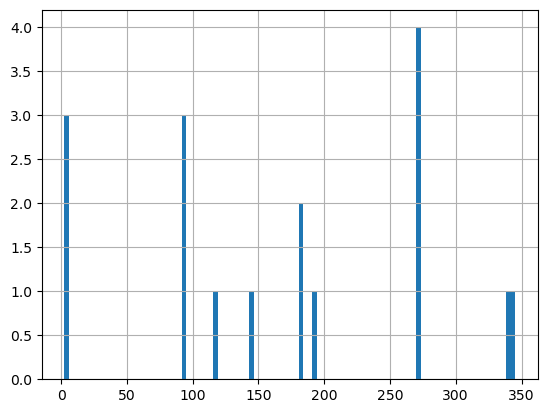

swarm


KeyError: 'RA_OF_ASC_NODE'

In [68]:
for c in df_dict:
    print(c)
    hist, edges = np.histogram(df_dict[c]["RA_OF_ASC_NODE"], bins=100)
    size_mean = []
    for i in range(len(hist)):
        if(hist[i] > 0):
            #print("Bin of size", hist[i], "From {} to {}".format(edges[i], edges[i+1]))
            size_mean.append((hist[i], (edges[i] + edges[i+1]) / 2))
    for s, m in size_mean:
        print("(s: {}, m: {}) ".format(s, m), end="")
    print("")
    #print("histlen", len(hist), "edgelen", len(edges))
    df_dict[c]["RA_OF_ASC_NODE"].hist(bins=100)
    plt.show()

## Inclination Histogram

starlink
(s: 3010, m: 53.22091399999999) (s: 51, m: 70.192778) (s: 187, m: 97.437086) 


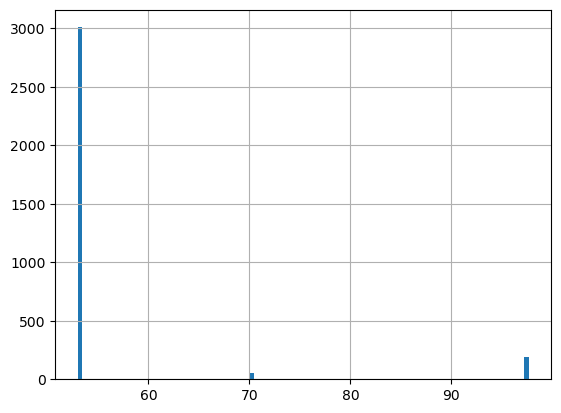

oneweb
(s: 5, m: 87.0047275) (s: 1, m: 87.0143825) (s: 2, m: 87.2171375) (s: 14, m: 87.22679249999999) (s: 6, m: 87.2364475) (s: 3, m: 87.2461025) (s: 1, m: 87.3040325) (s: 1, m: 87.4585125) (s: 4, m: 87.46816749999999) (s: 5, m: 87.4778225) (s: 7, m: 87.48747750000001) (s: 7, m: 87.49713249999999) (s: 4, m: 87.5067875) (s: 1, m: 87.51644250000001) (s: 2, m: 87.5357525) (s: 4, m: 87.54540750000001) (s: 1, m: 87.55506249999999) (s: 1, m: 87.5647175) (s: 2, m: 87.57437250000001) (s: 2, m: 87.6998875) (s: 1, m: 87.7481625) (s: 1, m: 87.7578175) (s: 34, m: 87.87367750000001) (s: 52, m: 87.8833325) (s: 58, m: 87.8929875) (s: 115, m: 87.90264250000001) (s: 75, m: 87.9122975) (s: 35, m: 87.9219525) (s: 6, m: 87.93160750000001) (s: 2, m: 87.9412625) (s: 1, m: 87.9509175) (s: 7, m: 87.96057250000001) 


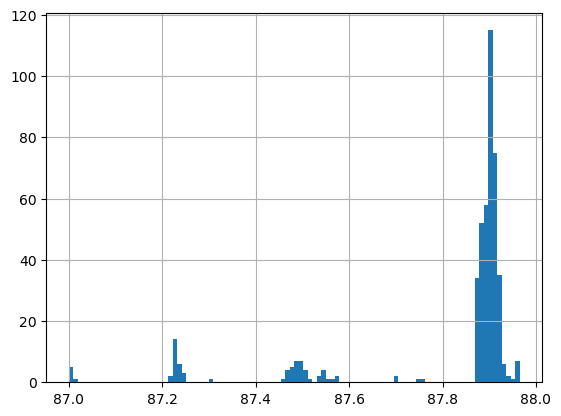

iridium
(s: 33, m: 86.39608849999999) (s: 21, m: 86.39826550000001) (s: 13, m: 86.4004425) (s: 1, m: 86.4265665) (s: 3, m: 86.4483365) (s: 1, m: 86.4505135) (s: 3, m: 86.61161150000001) 


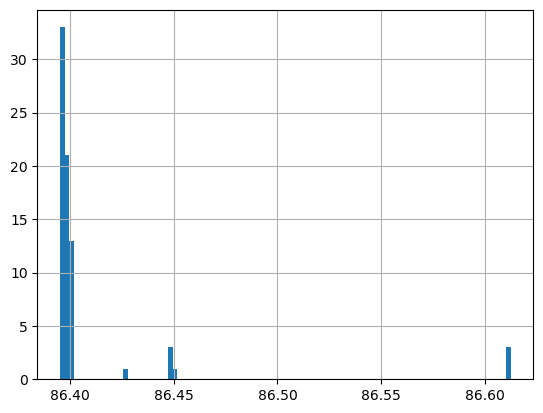

telesat
(s: 15, m: 0.49741250000000004) (s: 1, m: 1.4898375000000001) (s: 1, m: 2.4822625000000005) (s: 1, m: 3.4746875000000004) (s: 1, m: 6.4519625000000005) (s: 1, m: 12.406512500000002) (s: 1, m: 98.7474875) 


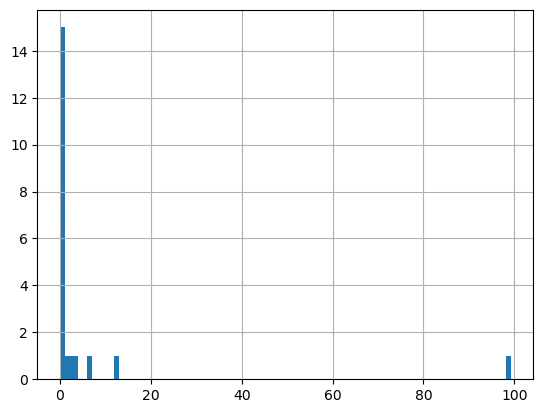

orbcomm
(s: 1, m: 20.098499500000003) (s: 16, m: 46.9274005) 


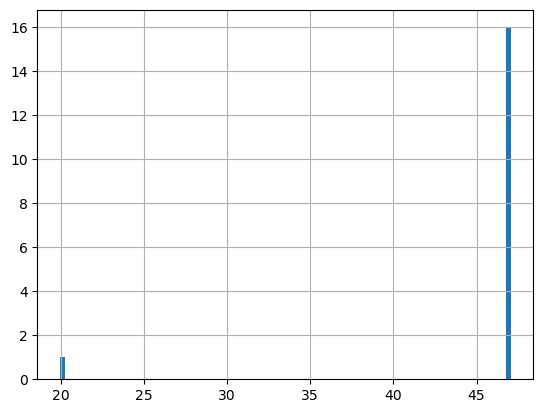

swarm
(s: 11, m: 97.1919) (s: 1, m: 97.1995) (s: 10, m: 97.37049999999999) (s: 2, m: 97.3819) (s: 12, m: 97.40090000000001) (s: 8, m: 97.41989999999998) (s: 27, m: 97.4313) (s: 33, m: 97.43889999999999) (s: 2, m: 97.4503) (s: 16, m: 97.5111) (s: 6, m: 97.54909999999998) (s: 6, m: 97.56049999999999) (s: 12, m: 97.56809999999999) 


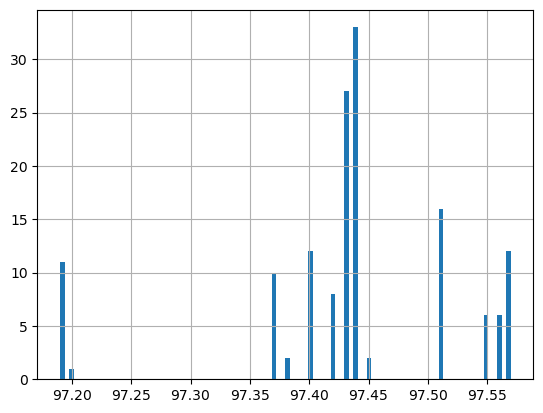

In [91]:
for c in df_dict:
    print(c)
    hist, edges = np.histogram(df_dict[c]["INCLINATION"], bins=100)
    size_mean = []
    for i in range(len(hist)):
        if(hist[i] > 0):
            #print("Bin of size", hist[i], "From {} to {}".format(edges[i], edges[i+1]))
            size_mean.append((hist[i], (edges[i] + edges[i+1]) / 2))
    for s, m in size_mean:
        print("(s: {}, m: {}) ".format(s, m), end="")
    print("")
    #print("histlen", len(hist), "edgelen", len(edges))
    df_dict[c]["INCLINATION"].hist(bins=100)
    plt.show()

## Launch Year Histogram

starlink
Bin of size 49 From 2019.0 to 2019.06
Bin of size 705 From 2019.96 to 2020.02
Bin of size 941 From 2020.98 to 2021.04
Bin of size 1553 From 2021.94 to 2022.0


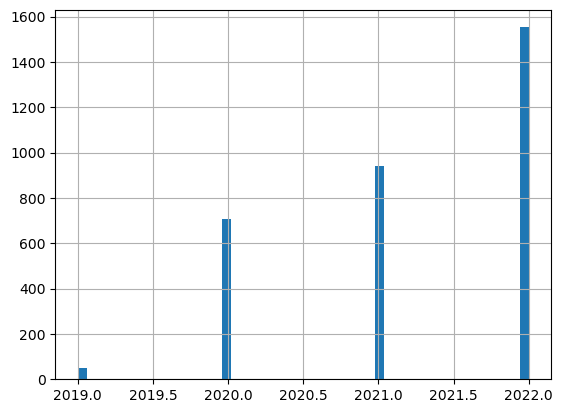

oneweb
Bin of size 6 From 2019.0 to 2019.06
Bin of size 103 From 2019.96 to 2020.02
Bin of size 282 From 2020.98 to 2021.04
Bin of size 69 From 2021.94 to 2022.0


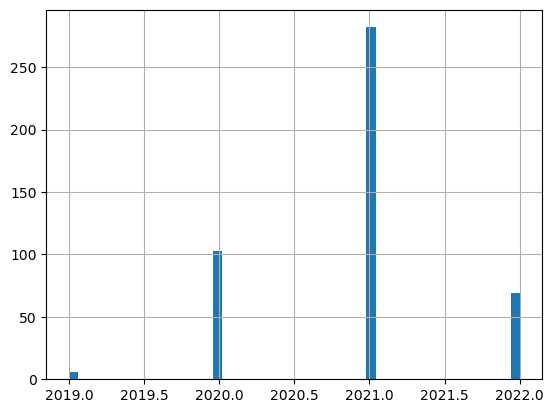

planet
Bin of size 3 From 2013.0 to 2013.18
Bin of size 12 From 2013.9 to 2014.08
Bin of size 15 From 2015.88 to 2016.06
Bin of size 95 From 2016.96 to 2017.14
Bin of size 30 From 2017.86 to 2018.04
Bin of size 32 From 2018.94 to 2019.12
Bin of size 41 From 2019.84 to 2020.02
Bin of size 48 From 2020.92 to 2021.1
Bin of size 44 From 2021.82 to 2022.0


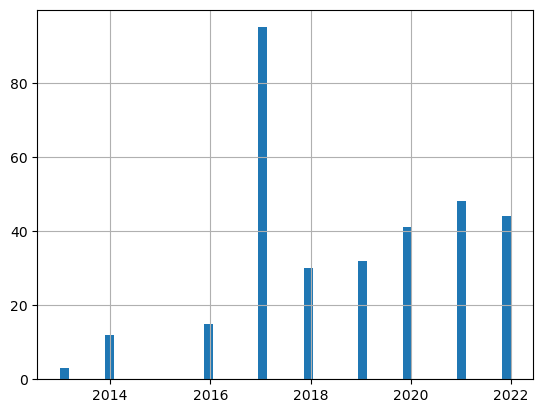

iridium
Bin of size 40 From 2017.0 to 2017.04
Bin of size 25 From 2018.0 to 2018.04
Bin of size 10 From 2018.96 to 2019.0


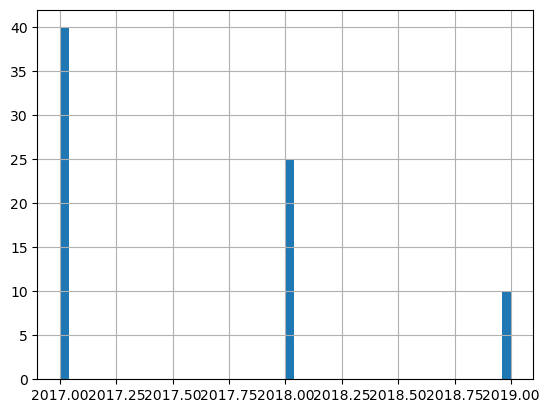

gps
Bin of size 1 From 1997.0 to 1997.48
Bin of size 2 From 1999.88 to 2000.36
Bin of size 2 From 2002.76 to 2003.24
Bin of size 2 From 2003.72 to 2004.2
Bin of size 1 From 2004.68 to 2005.16
Bin of size 2 From 2005.64 to 2006.12
Bin of size 2 From 2006.6 to 2007.08
Bin of size 1 From 2007.56 to 2008.04
Bin of size 1 From 2009.0 to 2009.48
Bin of size 1 From 2009.96 to 2010.44
Bin of size 1 From 2010.92 to 2011.4
Bin of size 1 From 2011.88 to 2012.36
Bin of size 1 From 2012.84 to 2013.32
Bin of size 4 From 2013.8 to 2014.28
Bin of size 3 From 2014.76 to 2015.24
Bin of size 1 From 2015.72 to 2016.2
Bin of size 1 From 2017.64 to 2018.12
Bin of size 1 From 2018.6 to 2019.08
Bin of size 2 From 2019.56 to 2020.04
Bin of size 1 From 2020.52 to 2021.0


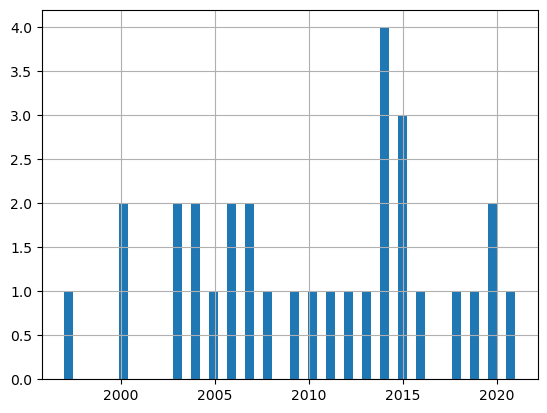

glonass
Bin of size 4 From 2007.0 to 2007.3
Bin of size 2 From 2008.8 to 2009.1
Bin of size 1 From 2010.0 to 2010.3
Bin of size 3 From 2010.9 to 2011.2
Bin of size 1 From 2013.0 to 2013.3
Bin of size 3 From 2013.9 to 2014.2
Bin of size 1 From 2016.0 to 2016.3
Bin of size 1 From 2016.9 to 2017.2
Bin of size 2 From 2017.8 to 2018.1
Bin of size 2 From 2019.0 to 2019.3
Bin of size 3 From 2019.9 to 2020.2
Bin of size 1 From 2021.7 to 2022.0


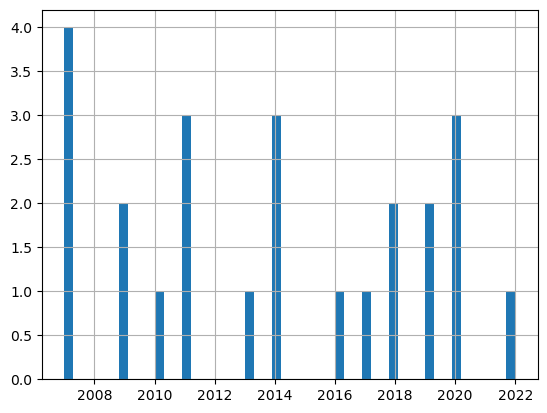

meteosat
Bin of size 1 From 2005.0 to 2005.2
Bin of size 1 From 2012.0 to 2012.2
Bin of size 1 From 2014.8 to 2015.0


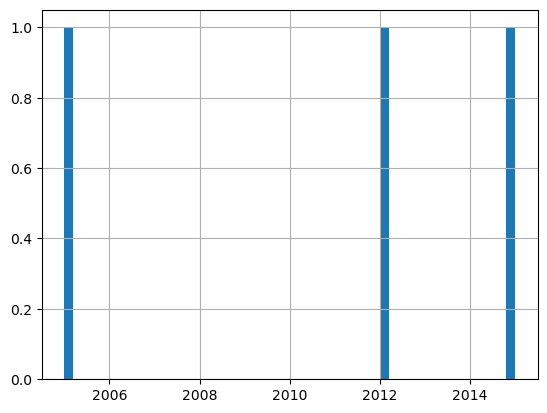

intelsat
Bin of size 7 From 1997.0 to 1997.5
Bin of size 2 From 1999.0 to 1999.5
Bin of size 5 From 2000.0 to 2000.5
Bin of size 9 From 2001.0 to 2001.5
Bin of size 12 From 2002.0 to 2002.5
Bin of size 8 From 2003.0 to 2003.5
Bin of size 2 From 2004.0 to 2004.5
Bin of size 9 From 2005.0 to 2005.5
Bin of size 3 From 2006.0 to 2006.5
Bin of size 9 From 2007.0 to 2007.5
Bin of size 11 From 2008.0 to 2008.5
Bin of size 7 From 2009.0 to 2009.5
Bin of size 6 From 2010.0 to 2010.5
Bin of size 7 From 2011.0 to 2011.5
Bin of size 16 From 2012.0 to 2012.5
Bin of size 3 From 2014.0 to 2014.5
Bin of size 3 From 2015.0 to 2015.5
Bin of size 10 From 2016.0 to 2016.5
Bin of size 9 From 2017.0 to 2017.5
Bin of size 4 From 2018.0 to 2018.5
Bin of size 3 From 2019.0 to 2019.5
Bin of size 4 From 2020.0 to 2020.5
Bin of size 9 From 2021.5 to 2022.0


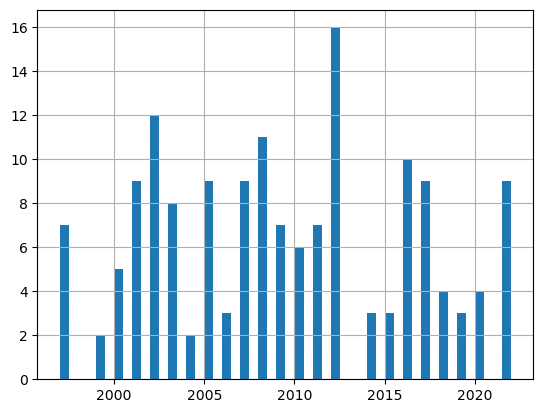

ses
Bin of size 1 From 1996.0 to 1996.44
Bin of size 2 From 1996.88 to 1997.32
Bin of size 1 From 1997.76 to 1998.2
Bin of size 1 From 1998.64 to 1999.08
Bin of size 4 From 1999.96 to 2000.4
Bin of size 1 From 2000.84 to 2001.28
Bin of size 3 From 2001.72 to 2002.16
Bin of size 2 From 2003.92 to 2004.36
Bin of size 1 From 2004.8 to 2005.24
Bin of size 2 From 2005.68 to 2006.12
Bin of size 2 From 2007.0 to 2007.44
Bin of size 2 From 2007.88 to 2008.32
Bin of size 3 From 2008.76 to 2009.2
Bin of size 2 From 2009.64 to 2010.08
Bin of size 3 From 2010.96 to 2011.4
Bin of size 3 From 2011.84 to 2012.28
Bin of size 3 From 2012.72 to 2013.16
Bin of size 2 From 2013.6 to 2014.04
Bin of size 1 From 2015.8 to 2016.24
Bin of size 3 From 2016.68 to 2017.12
Bin of size 1 From 2017.56 to 2018.0


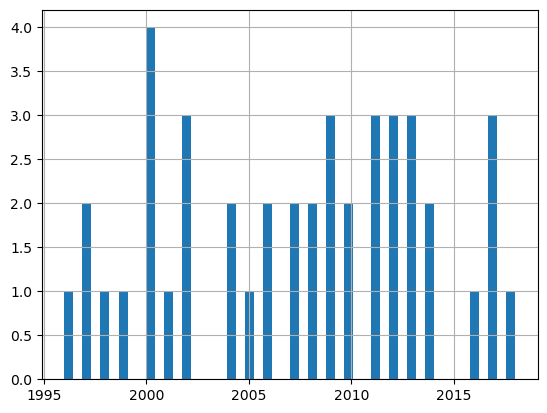

telesat
Bin of size 1 From 1995.0 to 1995.48
Bin of size 1 From 1999.8 to 2000.28
Bin of size 1 From 2001.72 to 2002.2
Bin of size 1 From 2003.64 to 2004.12
Bin of size 2 From 2004.6 to 2005.08
Bin of size 1 From 2007.0 to 2007.48
Bin of size 1 From 2007.96 to 2008.44
Bin of size 3 From 2008.92 to 2009.4
Bin of size 1 From 2009.88 to 2010.36
Bin of size 1 From 2010.84 to 2011.32
Bin of size 1 From 2011.8 to 2012.28
Bin of size 1 From 2012.76 to 2013.24
Bin of size 1 From 2014.68 to 2015.16
Bin of size 1 From 2016.6 to 2017.08
Bin of size 3 From 2017.56 to 2018.04
Bin of size 1 From 2018.52 to 2019.0


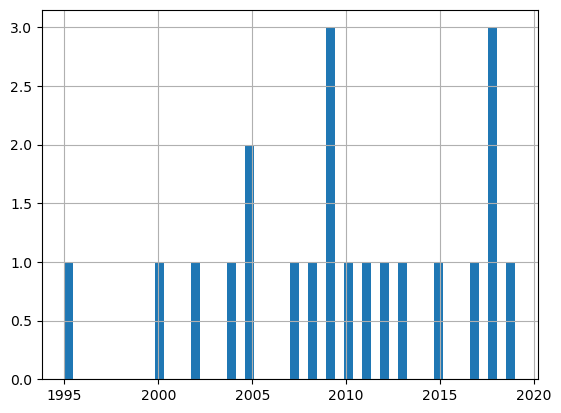

orbcomm
Bin of size 1 From 2011.0 to 2011.08
Bin of size 5 From 2013.96 to 2014.04
Bin of size 11 From 2014.92 to 2015.0


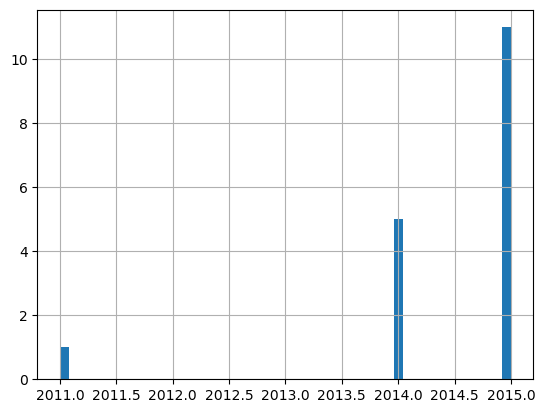

In [26]:
import numpy as np
import matplotlib.pyplot as plt
for c in df_dict:
    print(c)
    hist, edges = np.histogram(df_dict[c]["LAUNCH_YEAR"], bins=50)
    for i in range(len(hist)):
        if(hist[i] > 0):
            print("Bin of size", hist[i], "From {} to {}".format(edges[i], edges[i+1]))
    #print("histlen", len(hist), "edgelen", len(edges))
    df_dict[c]["LAUNCH_YEAR"].hist(bins=50)
    plt.show()

## Clustering of Orbital Planes

In [25]:
from scipy.cluster.vq import whiten, kmeans, vq, kmeans2

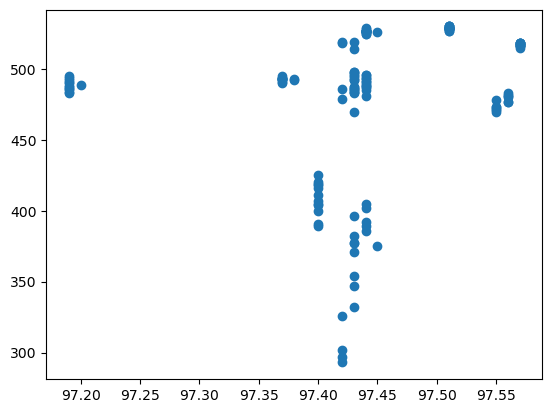

In [70]:
plt.scatter(df_dict["swarm"]["INCLINATION"],
            df_dict["swarm"]["APOGEE"])

In [75]:
data = np.array([z for z in zip(
            df_dict["swarm"]["INCLINATION"],
            df_dict["swarm"]["APOGEE"])])

dm = []
for k in range(20):
    
    data_std = data.std(axis=0)
    data_mean = data.mean(axis=0)
    data_norm = (data-data_mean) / data_std
    data_norm = data

    # assign centroids and clusters
    centroids, clusters = kmeans(data_norm, k+1)
    clusters, distances = vq(data_norm, centroids)

    #print("Centroids :\n", (centroids * data_std) + data_mean, "\n")
    #print("Cluster index :", clusters, "\n")
    #print("Distance from the centroids :", distances.mean())
    dm.append(distances.mean())
    

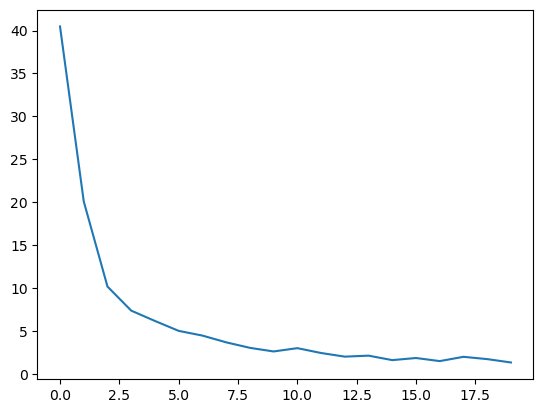

In [76]:
plt.plot(dm)

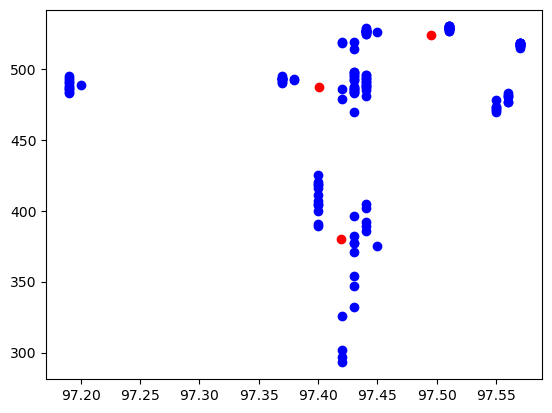

In [90]:
data_std = data.std(axis=0)
data_mean = data.mean(axis=0)
data_norm = (data-data_mean) / data_std
data_norm = data

# assign centroids and clusters
centroids, clusters = kmeans(data_norm, 3)

#plt.xlim(52, 57)
#plt.ylim(0, 360)
plt.scatter([p[0] for p in data], [p[1] for p in data], color="blue")
plt.scatter([p[0] for p in centroids], [p[1] for p in centroids], color="red")

## RAAN-Inclination Scatter Plot of Starlink orbits 2023-03-24

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [167]:
def adjust_tle0(tle0):
    number_ = tle0.split("-")[1]
    number = number_.split(" ")[0]
    return int(number)

starlinkorbits = pd.read_csv("data/2023-03-24_starlinkorbits.csv")
starlinkorbits["STARLINK_NUMBER"] = starlinkorbits["ORBIT_TLE0"].apply(adjust_tle0)
starlinkorbits.set_index("STARLINK_NUMBER", inplace=True)

def adjust_slname(name):
    number = name.split(" ")[1]
    number = number.split(",")[0]
    return int(number)
starlinkrevgroup = pd.read_csv("data/2023-03-24_starlinkrevgroup.csv")
starlinkrevgroup = starlinkrevgroup.dropna(subset="StarlinkName")
starlinkrevgroup["LaunchDate"] = starlinkrevgroup["LaunchDate"].apply(datetime.fromisoformat)
starlinkrevgroup["STARLINK_NUMBER"] = starlinkrevgroup["StarlinkName"].apply(adjust_slname)
starlinkrevgroup.set_index("STARLINK_NUMBER", inplace=True)

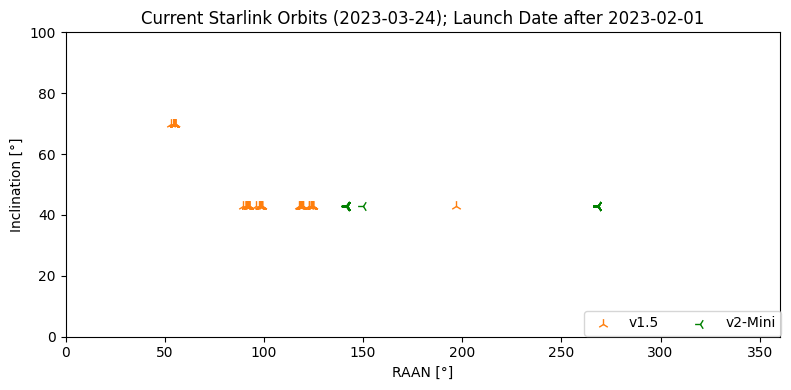

In [168]:
starlinkrevgroup = starlinkrevgroup[
    starlinkrevgroup["LaunchDate"]
        > datetime.fromisoformat("2023-02-01")
]
#starlinkrevgroup = starlinkrevgroup[
#    starlinkrevgroup["LaunchDate"]
#        < datetime.fromisoformat("2022-10-01")
#]

df = starlinkorbits.join(starlinkrevgroup, how="inner")

fig, ax = plt.subplots(figsize=(8, 4))
plt.xlim(0, 360)
plt.ylim(0, 100)
revs = df["Revision"].unique()
for rev in revs:
    revdf = df[df["Revision"] == rev]
    if (rev == "v1.0"):
        marker = "1"
        size = 60.0
        lw = 1
        color = "#1f77b4"
    elif (rev == "v1.5"):
        marker = "2"
        size = 60.0
        lw = 1
        color = "#ff7f0e"
    else:
        marker = "3"
        size = 60.0
        lw = 1
        color = "g"
    ax.scatter(
            revdf["ORBIT_RAANDeg"],
            revdf["ORBIT_InclinationDeg"],
            sizes=[size],
            linewidth=lw,
            label = rev,
            color = color,
            marker=marker
    )
plt.legend(loc='lower right', bbox_to_anchor=(1.012, -0.02),
          ncol=2, fancybox=True, shadow=False)
#plt.axis('tight')
plt.ylabel("Inclination [°]")
plt.xlabel("RAAN [°]")
plt.title("Current Starlink Orbits (2023-03-24); Launch Date after 2023-02-01")
plt.savefig("temp.png", dpi=300)
plt.tight_layout()
plt.show()